## Generating CLIWOC missing code tables

The Climatological Database for the World's Oceans 1750-1850 ([CLIWOC](https://stvno.github.io/page/cliwoc/)) has valuable information on its supplemental data stored in the [IMMA](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) format under the C99 column.

We have successfully extracted this information with the [mdf_reader()](https://git.noc.ac.uk/brecinosrivas/mdf_reader) tool, but several important variables are missing their code tables.

List of variables:

- Ship types
- latitude indicator
- longitude indicator,
- air temperature units
- sst units
- air pressure units
- units of attached thermometer
- longitude units
- Barometer type
- Distance units
- Distance units to land marks
- Distance units of how much the ship traveled
- Units of other measurements (e.g. current speed)
- Humidity units

According to the [documentation](https://stvno.github.io/page/cliwoc/) of this deck (730) there are up to 20 different ways of writing down the air pressure but the code tables are not available anymore on the website. Therefore, we extracted from the supplemental data all possible entries for those fields which are missing a code table. We count each entry in order to construct a code table for that particular variable.

The code to extract multiple variables from the CLIWOC supplemental data can be found [here](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/blob/master/tests/gather_stats_c99.py)

### Set up

In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# PARAMS for plots
from matplotlib import rcParams

sns.set_style("whitegrid")
rcParams["axes.labelsize"] = 14
rcParams["xtick.labelsize"] = 14
rcParams["ytick.labelsize"] = 14
rcParams["legend.fontsize"] = 16
rcParams["legend.title_fontsize"] = 16

We stored the statistics per year in python pickle dictionaries.

In [2]:
# Paths to data
dirs = "/Users/brivas/c3s_work/mdf_reader/tests/data/133-730/133-730"
file_names = sorted(os.listdir(dirs))

In [3]:
file_names[0:5]

['1662.pkl', '1663.pkl', '1677.pkl', '1699.pkl', '1745.pkl']

In [4]:
def get_values(dic, key, year):
    """
    Get individual sets of values from the pickle df
    Params:
    ------
    dic: python dictionary containing all variables stats per year
    key: variable name
    year: year to extract
    Returns:
    --------
    indexes: these are the variable types (e.g. barque or nan)
    series.values: these are the counts of how many that variable name gets repeated
    year: year to sample
    """
    series = dic[key]
    indexes = series.index.values
    year = np.repeat(year, len(indexes))
    return indexes, series.values, year

In [5]:
def exptract_year_arrays(path_to_file, key):
    """
    Reads pickle file and extracts the variable arrays per year
    Parms:
    -----
    path_to_file: path to the pickle file
    key: variable to extract
    Returns:
    --------
    df: dataframe from get_df

    """
    with open(path_to_file, "rb") as handle:
        base = os.path.basename(path_to_file)
        year = os.path.splitext(base)[0]
        dic_pickle = pickle.load(handle)
        df = get_values(dic_pickle, key, year)
        return df

In [6]:
def make_data_frame(list_of_files, main_directory, key):
    # Define empty arrays to store the data
    years = np.array([])
    types_of_var = np.array([])
    counts_var = np.array([])

    for file in list_of_files:
        full_path = os.path.join(main_directory, file)
        var_type, count, year_f = exptract_year_arrays(full_path, key)
        years = np.concatenate([years, year_f])
        types_of_var = np.concatenate([types_of_var, var_type])
        counts_var = np.concatenate([counts_var, count])

    dataset = pd.DataFrame({"Year": years, key: types_of_var, "Count": counts_var})

    return dataset

In [7]:
dirs

'/Users/brivas/c3s_work/mdf_reader/tests/data/133-730/133-730'

In [8]:
# List of variables names stored in the pickle files
dic_keys = [
    "ship_types",
    "lan_inds",  # in a silly mistake I wrote lat wrong in the output data set. Oh well
    "lon_inds",
    "at_units",
    "sst_units",
    "ap_units",
    "bart_units",
    "lon_units",
    "baro_types",
    "distance_units",
    "distance_units_to_land",
    "distance_units_travelled",
    "units_of_other_measurements",
    "humidity_units",
]


df_ships = make_data_frame(file_names, dirs, dic_keys[0]).dropna()
df_lati = make_data_frame(file_names, dirs, dic_keys[1]).dropna()
df_loni = make_data_frame(file_names, dirs, dic_keys[2]).dropna()
df_atu = make_data_frame(file_names, dirs, dic_keys[3]).dropna()
df_sstu = make_data_frame(file_names, dirs, dic_keys[4]).dropna()
df_apu = make_data_frame(file_names, dirs, dic_keys[5]).dropna()
df_bartu = make_data_frame(file_names, dirs, dic_keys[6]).dropna()
df_lonu = make_data_frame(file_names, dirs, dic_keys[7]).dropna()
df_barot = make_data_frame(file_names, dirs, dic_keys[8]).dropna()

df_distu = make_data_frame(file_names, dirs, dic_keys[9]).dropna()
df_distu_land = make_data_frame(file_names, dirs, dic_keys[10]).dropna()
df_distu_travel = make_data_frame(file_names, dirs, dic_keys[11]).dropna()
df_unit_m = make_data_frame(file_names, dirs, dic_keys[12]).dropna()
df_humi_u = make_data_frame(file_names, dirs, dic_keys[13]).dropna()

- Ship types

In [9]:
types_of_ships = df_ships.ship_types.unique()
types_of_ships

array(['GALJOOT', 'NAVIO', '5TH RATE', '6TH RATE', 'FRIGATE',
       'SHIP O.T. LINE', 'SLOOP', 'FREGAT', '4TH RATE', 'SNOW',
       '3RD RATE', 'FR�GATE', 'FREGATE', 'FREGATTE', '2ND RATE', 'NAV�O',
       'SNAUW', 'BOMB VESSEL, SL', 'OORLOGSSCHIP', 'BOMB/EXPLORATIO',
       'OORLOGSSNAUW', 'SLOOP (?)', 'STORESHIP', 'BRIK', 'PAQUEBOTE',
       'CUTTER', 'FRAGATA', 'FRAGATA CORREO', 'PAQUEBOT', 'BALANDRA',
       'BARK', 'BERGANTIN', 'SLOOP, THREE MA', '6TH RATE FRIGAT',
       'SPIEGELRETOURSC', 'TRANSPORT', 'EXPLORATION VES', 'MERCHANT BRIG',
       'CHAMBEQU�N', 'BUQUE', 'FRAGATA DE GUER', 'FIRESHIP', 'SNAAUW',
       'NAV�O DE LA REA', 'BRIG', 'ADVIJSJAGT', 'KOTTER', '7TH RATE',
       'BRIGANTIJN', '8TH RATE', 'CORVETTE', 'COTTER', 'GABARRE',
       'BRIG/SLOOP', 'PINK', 'BARGENTIJN', 'HOEKERSCHIP', "L'AVISO",
       'FLUTE', 'GOLETA GUARDA C', 'HOEKER', 'CORVETA', 'FLUIT',
       'POLACRA', 'WHALER', 'PAKKETBOOT (BRI', 'ARMED STORESHIP', 'SLOEP',
       'SCHOENER', 'PACKET SHIP',

In [10]:
len(types_of_ships)

89

Now we subdivide `ship_types` into groups that represent the types of sailing/steam ships or into a general category **sailing ship**; which covers all the different translations of the word ship in all languages of the data set.

In [11]:
df = pd.DataFrame({"Types of Ship": types_of_ships})

Bark or Barque can also be refer as barc (e.g Falucho in [catalan](https://es.wikipedia.org/wiki/Barca_levantina))

In [12]:
Bark_or_Barque = df[df["Types of Ship"].str.contains("|".join(["BARK", "FALUCHO"]))]
Bark_or_Barque

,Types of Ship
30,BARK
88,FALUCHO


In [13]:
Barkentine_or_Barquentine = df[
    df["Types of Ship"].str.contains("|".join(["BARQUEN", "BARKEN"]))
]
Barkentine_or_Barquentine

,Types of Ship


Brigantine

In [14]:
Brigantine = df[
    df["Types of Ship"].str.contains(
        "|".join(["BRIG", "BRIGAN", "BRIK", "BERGANTIN", "BRICK", "BARGENTIJN"])
    )
]
Brigantine

,Types of Ship
23,BRIK
31,BERGANTIN
37,MERCHANT BRIG
44,BRIG
48,BRIGANTIJN
53,BRIG/SLOOP
55,BARGENTIJN
76,BRIK VAN OORLOG
83,BRICK
85,SCHOENERBRIK


In [15]:
Schooner = df[df["Types of Ship"].str.contains("|".join(["SCHO", "GOLET"]))]
Schooner

,Types of Ship
59,GOLETA GUARDA C
68,SCHOENER
81,GOLETA
85,SCHOENERBRIK


In [16]:
Frigate = df[df["Types of Ship"].str.contains("GAT", regex=False)]
Frigate

,Types of Ship
4,FRIGATE
7,FREGAT
11,FR�GATE
12,FREGATE
13,FREGATTE
26,FRAGATA
27,FRAGATA CORREO
33,6TH RATE FRIGAT
40,FRAGATA DE GUER
78,FREGATSCHIP


In [17]:
Steam = df[df["Types of Ship"].str.contains("STEAM", regex=False)]
Steam

,Types of Ship
79,STEAMPOWERED WA
84,STEAMER


In [18]:
Corvet = df[df["Types of Ship"].str.contains("|".join(["KORV", "CORVE"]))]
Corvet

,Types of Ship
50,CORVETTE
61,CORVETA
70,KORVET
73,CORVET
75,KORVET V OORLOG
82,KORVET VAN OORL


In [19]:
Cotter = df[df["Types of Ship"].str.contains("|".join(["KOTT", "COTT", "CUTT"]))]
Cotter

,Types of Ship
25,CUTTER
46,KOTTER
51,COTTER


In [20]:
Sloop = df[df["Types of Ship"].str.contains("|".join(["SLOOP", "SLOEP"]))]
Sloop

,Types of Ship
6,SLOOP
21,SLOOP (?)
32,"SLOOP, THREE MA"
53,BRIG/SLOOP
67,SLOEP


In [21]:
Snow = df[df["Types of Ship"].str.contains("|".join(["SNOW", "SNA"]))]
Snow

,Types of Ship
9,SNOW
16,SNAUW
20,OORLOGSSNAUW
42,SNAAUW


In [22]:
Naval_salining_ships = df[
    df["Types of Ship"].str.contains("|".join(["TH RATE", "AVISO", "RATE"]))
]
Naval_salining_ships

,Types of Ship
2,5TH RATE
3,6TH RATE
8,4TH RATE
10,3RD RATE
14,2ND RATE
33,6TH RATE FRIGAT
47,7TH RATE
49,8TH RATE
57,L'AVISO


In [23]:
East_Indianman = df[df["Types of Ship"].str.contains("SPIEGELRETOURSC")]
East_Indianman

,Types of Ship
34,SPIEGELRETOURSC


In [24]:
Scow = df[df["Types of Ship"].str.contains("GABARRE")]
Scow

,Types of Ship
52,GABARRE


In [25]:
Fluyt = df[df["Types of Ship"].str.contains("FLU")]
Fluyt

,Types of Ship
58,FLUTE
62,FLUIT


In [26]:
Ships_all_languages = df[
    df["Types of Ship"].str.contains(
        "|".join(
            [
                "SHIP",
                "PAQUE",
                "PAKKET",
                "BUQUE",
                "VES",
                "SCHIP",
                "NAV",
                "TRANSP",
                "EXPLOR",
                "CHAMBE",
                "BALANDRA",
                "PINK",
                "HOEKER",
                "POLACRA",
                "KOOP",
            ]
        )
    )
]
Ships_all_languages

,Types of Ship
1,NAVIO
5,SHIP O.T. LINE
15,NAV�O
17,"BOMB VESSEL, SL"
18,OORLOGSSCHIP
19,BOMB/EXPLORATIO
22,STORESHIP
24,PAQUEBOTE
28,PAQUEBOT
29,BALANDRA


In [27]:
total = (
    len(Bark_or_Barque)
    + len(Barkentine_or_Barquentine)
    + len(Brigantine)
    + len(Schooner)
    + len(Frigate)
    + len(Steam)
    + len(Corvet)
    + len(Cotter)
    + len(Sloop)
    + len(Snow)
    + len(Ships_all_languages)
    + len(East_Indianman)
    + len(Scow)
    + len(Fluyt)
)
total

80

There are about 9 sub types that are hard to classify and more research is needed.

- AT units

In [28]:
df_atu.at_units.unique()

array(['CELSIUS', 'FAHRENHEIT', 'REAMUR', 'REAUMUR'], dtype=object)

- SST units

In [29]:
df_sstu.sst_units.unique()

array(['FAHRENHEIT'], dtype=object)

- Air pressure units

In [30]:
df_apu.ap_units.unique()

array(['INCHES MERCURY', 'DLS12FRANS', 'DLS100', 'DLS10', 'DLS1004',
       'DLS1204F', 'DLS1200R', 'DLS1204R', 'INCHES MERCURY60', 'DLS1104R',
       'DLS1200', 'DLS12R', 'MILLIMETERS MERCURY', 'RHINE INCHE MERCURY',
       'DLS1004A', 'DLS12', 'DLS1204', 'DLS1004R', 'DLS10R',
       'AMST INCHES MERCURY'], dtype=object)

The **DLS** unit format is believed to stand for Dutch Lines and the 12R or 10R means that were reduced to 12 or 10 Réaumur (like pressures reduced to 32F). This is still an ongoing discussion.

- Attached thermometer units

In [31]:
df_bartu.bart_units.unique()

array(['FAHRENHEIT'], dtype=object)

- Longitude Units

In [32]:
df_lonu.lon_units.unique()

array(['360 DEGREES', '180 DEGREES', 'UNKNOWN', '180 GRADEN'],
      dtype=object)

- Barometer types:

In [33]:
df_barot.baro_types.unique()

array(['MERCURY', 'SYMPISIOMETER', 'ANEROID'], dtype=object)

- Other units for which there was no information

In [34]:
df_distu_land.distance_units_to_land.unique()

array(['UNKNOWN', 'DUITSE', 'LEAGUES', 'NM', 'MILES', 'MILLAS', 'LEGUAS',
       'MILE', 'MILAS', 'NAUTICA', 'LIEUES', 'MIJLEN', 'MIJL', 'ENGELSE'],
      dtype=object)

In [35]:
df_distu_travel.distance_units_travelled.unique()

array(['UNKNOWN', 'DUITSE', 'DESCONO', 'LEAGUES', 'NM', 'MILES', 'MILLAS',
       'LEGUAS', 'NAUTICA', 'ENGLISH', 'MILLAS/', 'M. POR', 'LEGUAS?',
       'MIJLEN', 'ENGELSE'], dtype=object)

In [36]:
df_unit_m.units_of_other_measurements.unique()

array(['CURRENT IN MILES PER HOUR', 'CURRENT IN NM',
       'CURRENT SPEED IN CABLES/FTMS PER H', 'CURRENT SPEED IN FATHAMS',
       'CURRENT SPEED IN FATHAMS PER HOUR', 'CURRENT SPEED IN FATHOMS',
       'CURRENT SPEED IN FATHOMS PER HOUR', 'CURRENT SPEED IN KNOTS',
       'CURRENT SPEED IN KNOTS/FTMS PER H', 'CURRENT SPEED IN KTS',
       'CURRENT SPEED IN MILES', 'CURRENT SPEED IN MILES PER HOUR',
       'CURRENT SPEED IN MILES/FTMS PER H', 'CURRENT SPEED IN NM',
       'CURRENT IN MILES', 'CURRENT SPEED IN MILES PER DAY',
       'CURRENT SPEED IN MPH', 'CURRENT SPEED IN NAUTICAL MILES PER DAY',
       'CURRENT SPEED IN MILES AND FTMS PER HOUR',
       'CURRENT SPEED IN KNOTS AND FATHOMS PER HOUR',
       'CURRENT SPEED IN LEAGUES', 'CURRENT SPEED IN KNOT',
       'CURRENT SPEED IN MILES PER WATCH',
       'CURRENT SPEED IN KNOTS PER HOUR',
       'CURRENT SPEED IN KNOTS AND FATHOMS PER H',
       'CURRENT SPEED IN FTHMS', 'CURRENT SPEED IN KT',
       'CURRENT SPEED IN FTH/PH', 'CU

In [37]:
df_humi_u.humidity_units.unique()

array(['UNKNOWN'], dtype=object)

An overview through time of some of the Barometer types and air pressure units

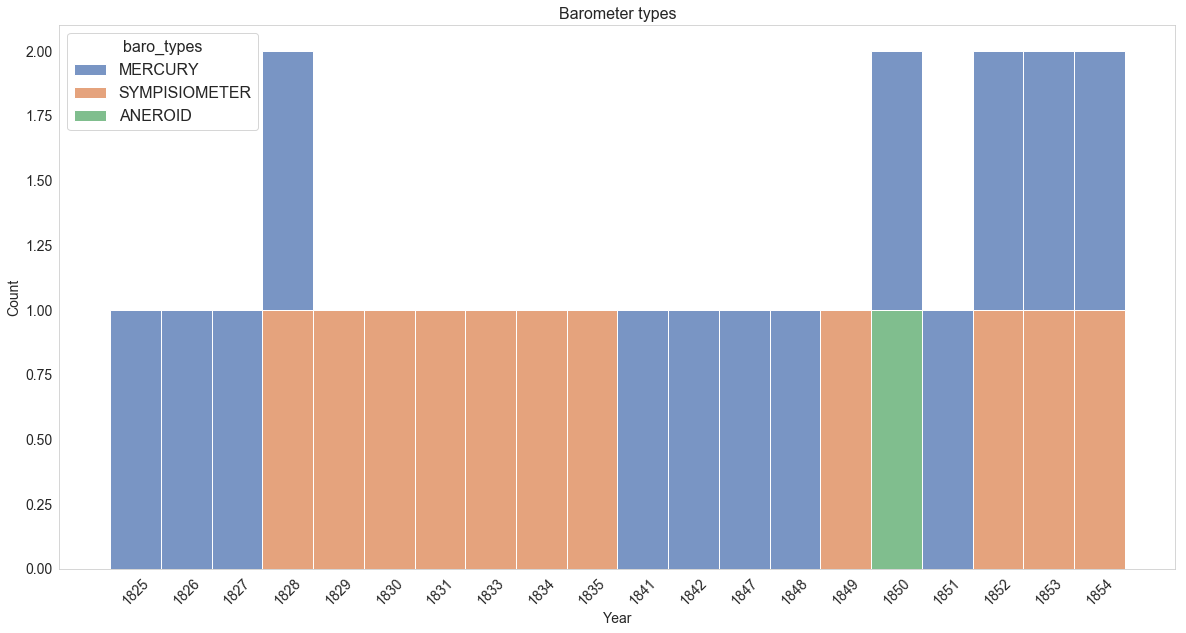

In [38]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)

g = sns.histplot(
    data=df_barot,
    x="Year",
    hue="baro_types",
    multiple="stack",
    palette="deep",
    ax=ax,
    legend=True,
)
ax.grid(False)
plt.setp(g.get_xticklabels(), rotation=45)
plt.title("Barometer types", fontsize=16)

plt.show()

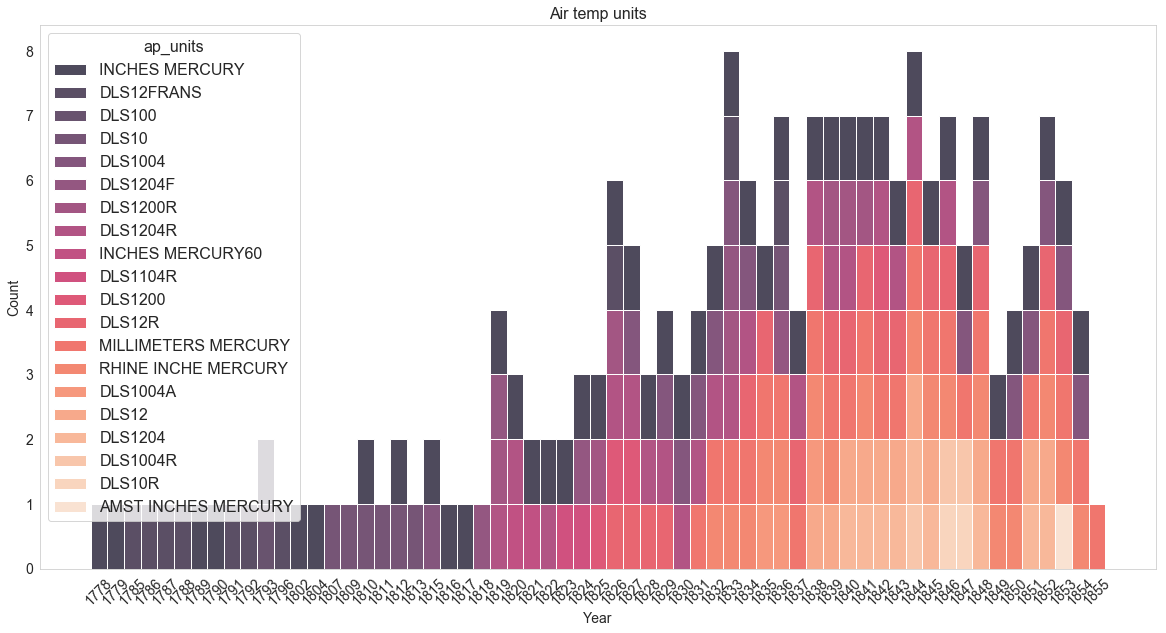

In [39]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)

cmap = sns.set_palette("rocket", n_colors=len(df_apu.ap_units.unique()))

g = sns.histplot(
    data=df_apu,
    x="Year",
    hue="ap_units",
    multiple="stack",
    palette=cmap,
    ax=ax,
    legend=True,
)
ax.grid(False)
plt.setp(g.get_xticklabels(), rotation=45)
plt.title("Air temp units", fontsize=16)

plt.show()

**Overview of the position quality**

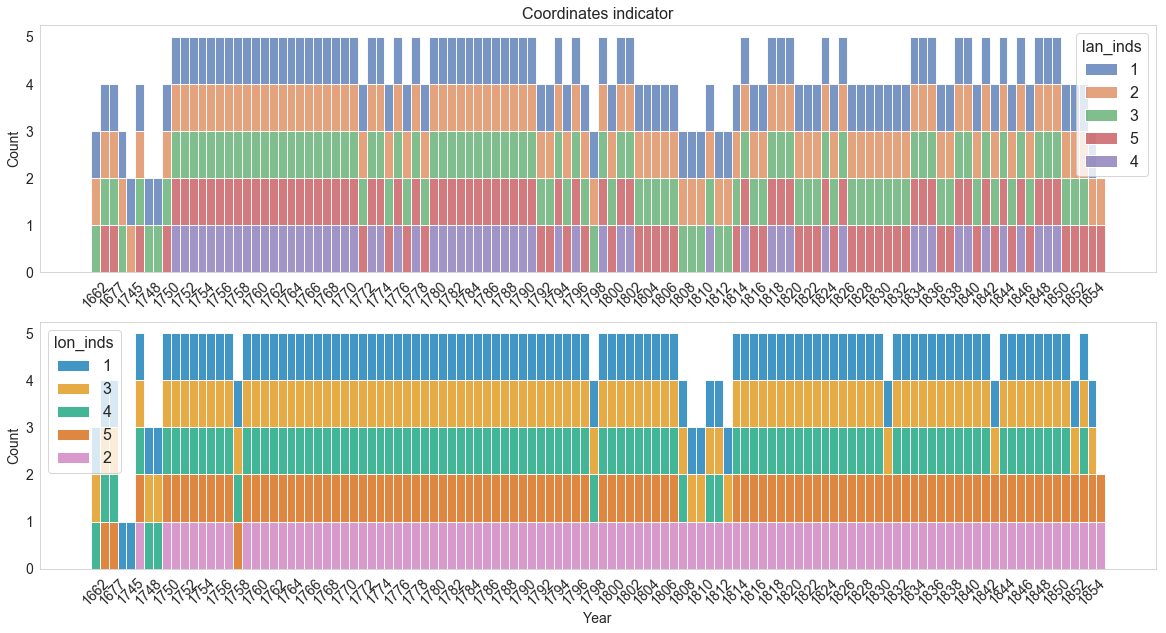

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))


g = sns.histplot(
    data=df_lati,
    x="Year",
    hue="lan_inds",
    multiple="stack",
    palette="deep",
    ax=ax[0],
    legend=True,
)
plt.setp(g.get_xticklabels(), rotation=45)
ax[0].grid(False)

xticks = ax[0].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 2 == 1:
        xticks[i].set_visible(False)

ax[0].set_title(
    "Coordinates indicator", fontdict={"fontsize": 16, "fontweight": "medium"}
)
ax[0].set_xlabel("")


p = sns.histplot(
    data=df_loni,
    x="Year",
    hue="lon_inds",
    multiple="stack",
    palette="colorblind",
    ax=ax[1],
    legend=True,
)
plt.setp(p.get_xticklabels(), rotation=45)
ax[1].grid(False)

xticks = ax[1].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 2 == 1:
        xticks[i].set_visible(False)

plt.show()

Code table for lat and lon indicators, according to this [information](https://stvno.github.io/page/cliwoc/):

```
{
	"1":"originates from dead reckoning",
	"2":"originates from true navigation (bearing/distance, celestial)",
	"3":"Interpolated manually",
	"4":"Interpolated",
	"5":"Inserted actual position (ports, islands, etc.)",
	"6":"Missing"
}
```

Is it worth using the coordinates from the supplemental metadata or should I use the imma.core lat and lon?